## **Mount implementation folder in google drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
%cd /content/drive/MyDrive/FYP/Implementation/data
! ls

/content/drive/MyDrive/FYP/Implementation/data
encoded-data.csv	preprosessing-dos.csv	  UNSW-NB15_1.csv
NUSW-NB15_features.csv	selected_columns_all.csv  UNSW-NB15_2.csv
OTset.csv		SVR-predict-data.csv	  UNSW-NB15_3.csv
preprocessing.csv	testset.csv		  UNSW-NB15_4.csv


## **Load balanced training datset for DOS attacks**

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import shuffle
from sklearn.utils import resample

#get select columns for training
select_col=pd.read_csv("selected_columns_all.csv", sep=',', on_bad_lines='skip', index_col=False)
columns=list(select_col['DoS'])


#create training dataset down sampling
df = pd.read_csv('encoded-data.csv', sep=',', on_bad_lines='skip', index_col=False)
attack_labels = ['Analysis', 'Backdoors', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'] + ['attack_cat','Label']


DoS_attacks = df[df['DoS'] == 1]
# print(DoS_attacks.shape)
Normal_Data = df[df['Label'] == 0].sample(n=100000)
print(Normal_Data.shape)

frames = [DoS_attacks, Normal_Data]
result = pd.concat(frames)
X=result.drop(labels=attack_labels, axis=1)
Y=result[['DoS']]
X.head()
x_train,y_train  = shuffle(X[columns],Y)
X_train_DoS_normalized = preprocessing.normalize(x_train)
X_train_DoS_normalized 




(100000, 46)


array([[5.09434181e-05, 8.78334796e-06, 5.44567573e-05, ...,
        5.77998752e-01, 1.44556341e-02, 3.51333918e-06],
       [0.00000000e+00, 1.13636346e-08, 1.13636346e-07, ...,
        1.57196946e-07, 5.52835143e-04, 1.13636346e-08],
       [5.41214415e-04, 9.33128302e-05, 5.78539547e-04, ...,
        4.99279629e-01, 2.58065963e-01, 7.46502641e-05],
       ...,
       [1.54464898e-05, 1.06527516e-06, 1.65117650e-05, ...,
        4.14642377e-02, 2.09760136e-01, 1.06527516e-06],
       [5.23723460e-05, 3.61188593e-06, 5.59842319e-05, ...,
        1.49893266e-04, 2.81149201e-01, 3.61188593e-06],
       [7.08087173e-05, 1.22083995e-05, 7.56920771e-05, ...,
        2.41946062e-01, 9.70240577e-01, 4.88335981e-06]])

## **Create Test Set for DOS attacks**

Data = (x_test_DOS_normalized, y_test)

In [4]:
import pandas as pd
import numpy as np
select_col=pd.read_csv("selected_columns_all.csv", sep=',', on_bad_lines='skip', index_col=False)

columns=list(select_col['DoS'])

test_data =pd.read_csv("testset.csv", sep=',', on_bad_lines='skip', index_col=False)
attack_labels = ['Analysis', 'Backdoors', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'] + ['attack_cat','Label']
attack_categories = ['Analysis', 'Backdoors', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'] 


for i in attack_categories:
  test_data[i] = test_data['attack_cat'].apply(lambda x: 1 if x == i else 0)

x_test=test_data[columns]
y_test= test_data['DoS']
print(y_test)
x_test = x_test.replace('-','')
x_test = x_test.replace(r'^\s*$', np.nan, regex=True)

#delete raws with missing values
for i in x_test.columns.values.tolist():
  i = x_test.loc[x_test[i].isnull()].index
  x_test = x_test.drop(index=list(i))
  y_test = y_test.drop(index=list(i))

percent_missing = x_test.isnull().sum()
missing_value_df = pd.DataFrame({'column_name': x_test.columns, 'count_missing': percent_missing, 'To be dropped': (percent_missing > 45)})
# print(missing_value_df)

x_test.head()
#encode the data
from sklearn.preprocessing import LabelEncoder

# # replace hex with int
x_test['sport'] = x_test['sport'].astype(str).apply(int, base=16)
x_test['dsport'] = x_test['dsport'].astype(str).apply(int, base=16)

# #Create an instance of Label-encoder
labelencoder = LabelEncoder() 

# # encode columns consists with strings
x_test['srcip'] = labelencoder.fit_transform(x_test['srcip'])
x_test['dstip'] = labelencoder.fit_transform(x_test['dstip'])
x_test['proto'] = labelencoder.fit_transform(x_test['proto'])
x_test['state'] = labelencoder.fit_transform(x_test['state'])

from sklearn import preprocessing
X_test_DoS_normalized = preprocessing.normalize(x_test)
X_test_DoS_normalized


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


0         0
1         0
2         0
3         0
4         0
         ..
508005    0
508006    0
508007    0
508008    0
508009    0
Name: DoS, Length: 508010, dtype: int64


array([[4.34384242e-05, 7.48938348e-06, 4.64341776e-05, ...,
        1.01454184e-01, 1.23170401e-01, 5.99150678e-06],
       [0.00000000e+00, 5.68181796e-09, 5.68181796e-08, ...,
        7.85984818e-08, 2.76417603e-04, 1.60984842e-08],
       [6.60532464e-05, 1.13884908e-05, 7.06086427e-05, ...,
        6.08751275e-01, 1.82013137e-01, 4.55539631e-06],
       ...,
       [5.98248709e-05, 4.12585317e-06, 6.39507241e-05, ...,
        7.36297694e-01, 4.17338300e-01, 1.23775595e-05],
       [6.53178060e-05, 1.12616907e-05, 6.98224823e-05, ...,
        8.85813057e-01, 4.63589749e-01, 9.00935255e-06],
       [5.30836221e-06, 9.15234863e-07, 5.67445615e-06, ...,
        2.95309681e-02, 6.47329145e-02, 7.32187891e-07]])

##**Isolation Forest**

In [16]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

#training data
x = X_train_DoS_normalized
x_test=X_test_DoS_normalized


# Number of trees in random forest
n_estimators = [2, 4, 8, 16, 32, 64, 100]
# Number of features to consider at every split
max_features = [0.5 ,  0.7, 0.8 , 1.0, 2.0, 3.0]
# Maximum number of levels in tree
bootstrap = [True, False]
contamination=['auto','legacy']

# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'contamination':contamination,
               'bootstrap': bootstrap}


def scorer_f(estimator, X):   #your own scorer
      return np.mean(estimator.score_samples(X))


 # create regressor object
regressor = GridSearchCV(IsolationForest(random_state=0),param_grid,scoring=scorer_f, return_train_score=False)

# fit the regressor with x and y data
regressor.fit(x)


df = pd.DataFrame(regressor.cv_results_)
df


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
560 fits failed out of a total of 840.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
140 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 678, in _fit_and_score
    estimator.fit(X_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_iforest.py", line 307, in fit
    super()._fit(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py", line 342, in _fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_contamination,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016539,0.001517,0.013007,0.000254,True,auto,0.5,2,"{'bootstrap': True, 'contamination': 'auto', '...",-0.407600,-0.436202,-0.416701,-0.428622,-0.439703,-0.425766,0.012029,56
1,0.026645,0.001514,0.023454,0.001104,True,auto,0.5,4,"{'bootstrap': True, 'contamination': 'auto', '...",-0.405081,-0.403444,-0.390600,-0.404023,-0.416453,-0.403920,0.008199,54
2,0.047164,0.000508,0.045484,0.001591,True,auto,0.5,8,"{'bootstrap': True, 'contamination': 'auto', '...",-0.392450,-0.390797,-0.388164,-0.395964,-0.399386,-0.393352,0.003937,50
3,0.091665,0.003258,0.082540,0.001528,True,auto,0.5,16,"{'bootstrap': True, 'contamination': 'auto', '...",-0.388820,-0.387690,-0.383014,-0.390404,-0.390757,-0.388137,0.002790,44
4,0.171491,0.002732,0.163558,0.002340,True,auto,0.5,32,"{'bootstrap': True, 'contamination': 'auto', '...",-0.382584,-0.382007,-0.381299,-0.381889,-0.383811,-0.382318,0.000851,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,0.004927,0.001045,0.000000,0.000000,False,legacy,3.0,8,"{'bootstrap': False, 'contamination': 'legacy'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,78
164,0.003961,0.000036,0.000000,0.000000,False,legacy,3.0,16,"{'bootstrap': False, 'contamination': 'legacy'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,79
165,0.004143,0.000232,0.000000,0.000000,False,legacy,3.0,32,"{'bootstrap': False, 'contamination': 'legacy'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,80
166,0.004003,0.000044,0.000000,0.000000,False,legacy,3.0,64,"{'bootstrap': False, 'contamination': 'legacy'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,139


In [17]:
print(regressor.best_params_)

{'bootstrap': False, 'contamination': 'auto', 'max_features': 0.8, 'n_estimators': 2}


In [9]:
 # create regressor object
regressor = IsolationForest(bootstrap= False, contamination= 'auto', max_features= 0.8, n_estimators= 2)

# fit the regressor with x and y data
regressor.fit(x)

IsolationForest(max_features=0.8, n_estimators=2)

In [10]:
scores = []
anomaly_score = []

scores = regressor.decision_function(x_test)

predict = regressor.predict(x_test)
anomaly_score = np.array([1 if i==-1 else 0 for i in predict])

print(y_test)
# print(scores.shape)
print(anomaly_score)

0         0
1         0
2         0
3         0
4         0
         ..
508005    0
508006    0
508007    0
508008    0
508009    0
Name: DoS, Length: 508008, dtype: int64
[0 0 0 ... 0 0 0]


In [11]:
y_test = np.array(y_test)

In [12]:
totalRows = y_test.shape[0]
correctRows = 0
for i in range(totalRows):
  if anomaly_score[i] == y_test[i]:
      correctRows += 1

accuracy = 100*correctRows/(totalRows)
print("Accuracy of the model:"+ str(accuracy)+'%')

Accuracy of the model:97.10024251586589%


**Predict on test set**

In [13]:
predict=regressor.predict(x_test)
score = regressor.score_samples(x)
score

score_test = regressor.score_samples(x_test)

##**Customized threshold**

In [14]:
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 10)
print(f'The customized score threshold for 10% of outliers is {score_threshold:.2f}')# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score_test]

The customized score threshold for 10% of outliers is -0.40


##**Test Set Accuracy**

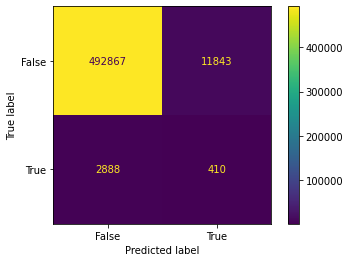

In [15]:
from sklearn import metrics
import matplotlib.pyplot as plt

predict= [1 if i==-1 else 0 for i in predict]
confusion_matrix = metrics.confusion_matrix(y_test, predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show() 